## Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import librosa, IPython
import librosa.display as lplt
import seaborn as sns
import sklearn.preprocessing as skp
from sklearn.preprocessing import MinMaxScaler

### Data

In [3]:
# Load CSV data
data_path = 'F:/university/milan/third semester/audio pattern/final/datasets/Data/features_3_sec.csv'
df = pd.read_csv(data_path)

In [15]:
print(df.head)

<bound method NDFrame.head of                filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rm

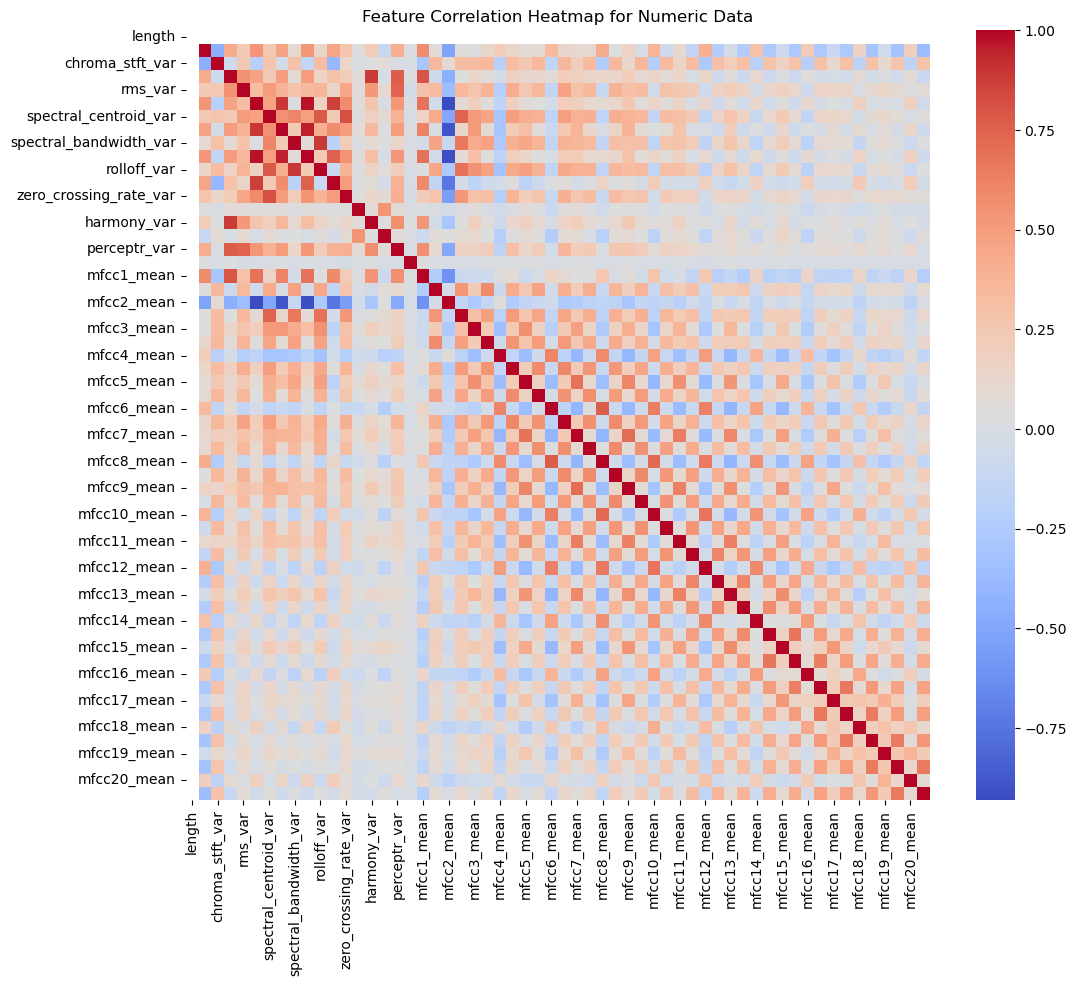

In [12]:
# Computing the Correlation Matrix for Numeric Data
def plot_feature_correlation(dataframe):
    # Automatically select only numeric columns
    numeric_df = dataframe.select_dtypes(include=['number'])
    
    # Check if numeric_df is empty
    if numeric_df.empty:
        print("No numeric features found in the dataset for correlation analysis.")
        return
    
    # Compute the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap for Numeric Data')
    plt.show()

# Call the updated function
plot_feature_correlation(df)


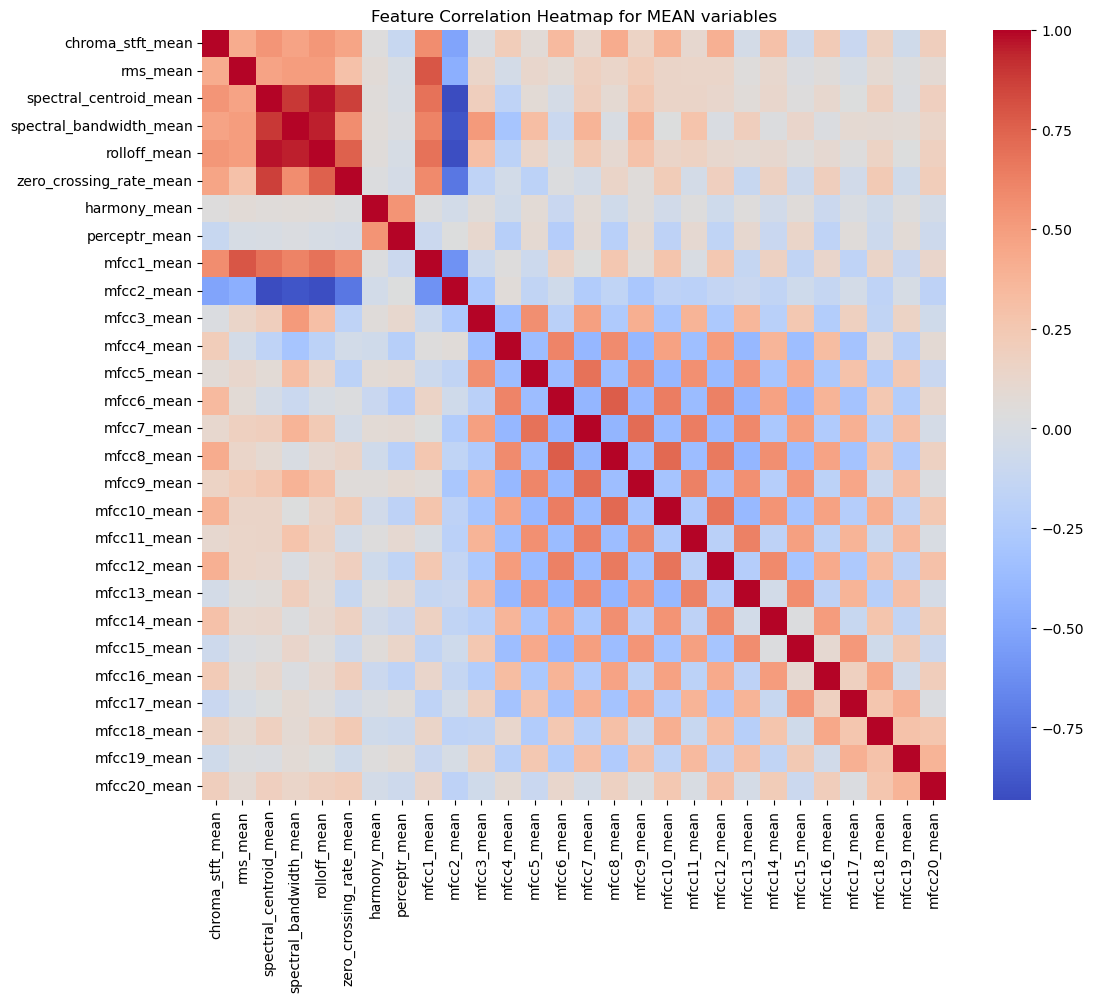

In [9]:
# Computing the Correlation Matrix for the MEAN variables
def plot_feature_correlation(dataframe):
    # Automatically select only numeric columns
    
    spike_cols = [col for col in dataframe if 'mean' in col]
    corr = dataframe[spike_cols].corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap for MEAN variables')
    plt.show()

# Call the updated function
plot_feature_correlation(df)

### About Dataset

In [10]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


label  count
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

### Data visualization

In [12]:
audio_fp = 'F:/university/milan/third semester/audio pattern/final/datasets/Data/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [13]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

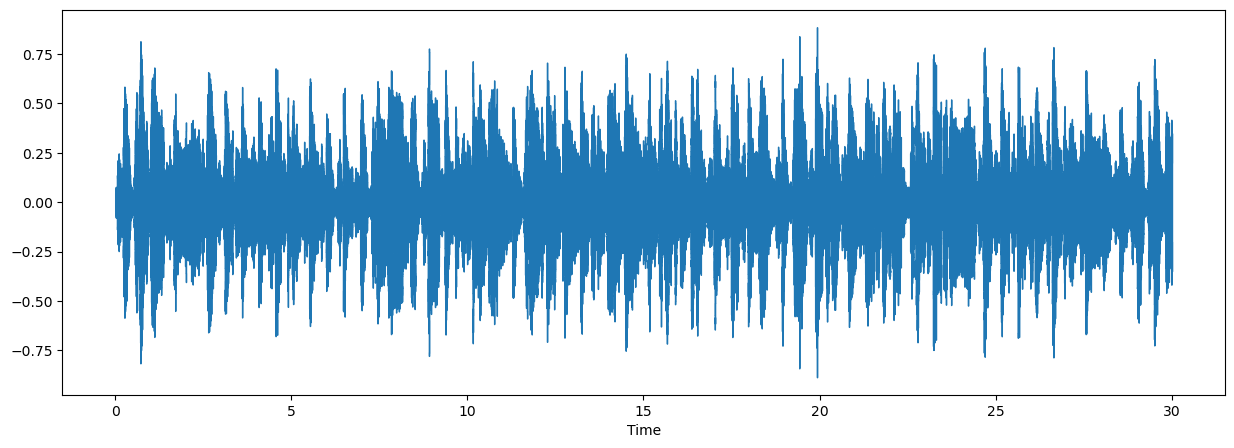

In [19]:
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveshow(audio_data)
plt.show()

C:\Users\ARASH\AppData\Local\Temp\ipykernel_19564\697118349.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  stft_db = librosa.amplitude_to_db(stft, ref=np.max)
C:\Users\ARASH\AppData\Local\Temp\ipykernel_19564\697118349.py:9: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


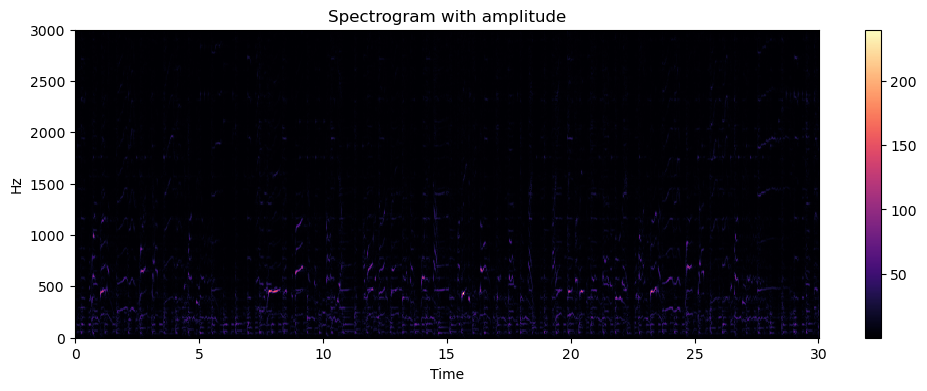

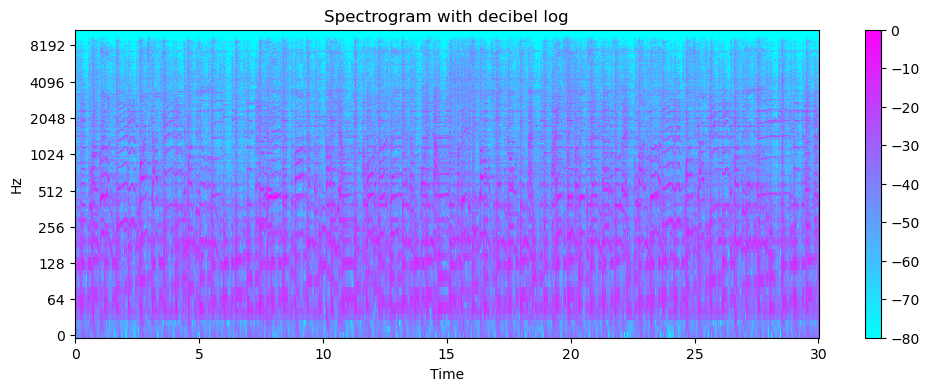

In [23]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.ylim(0, 3000)
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

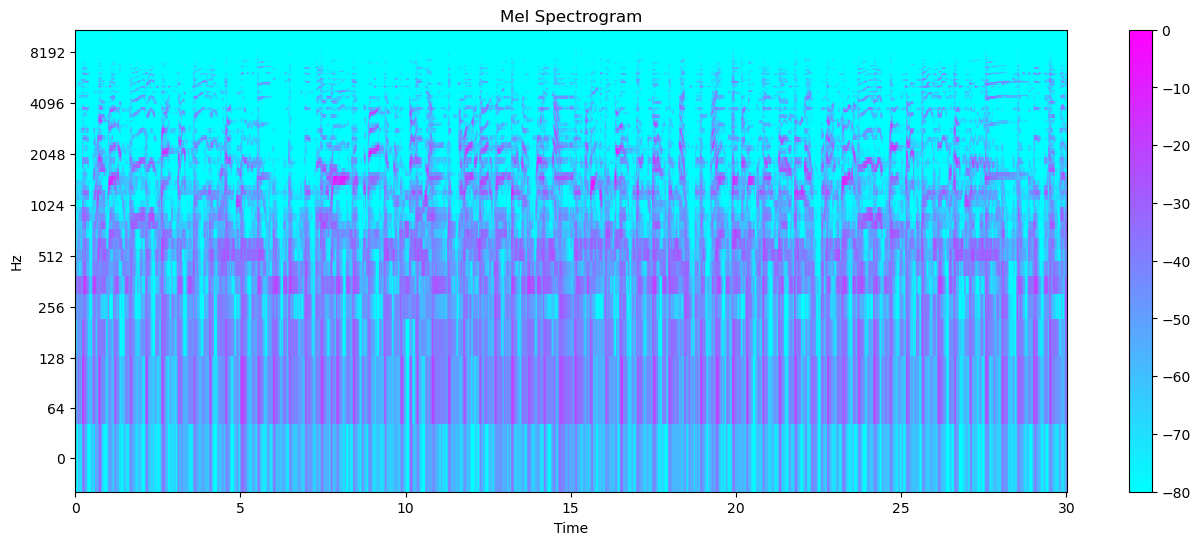

In [25]:
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

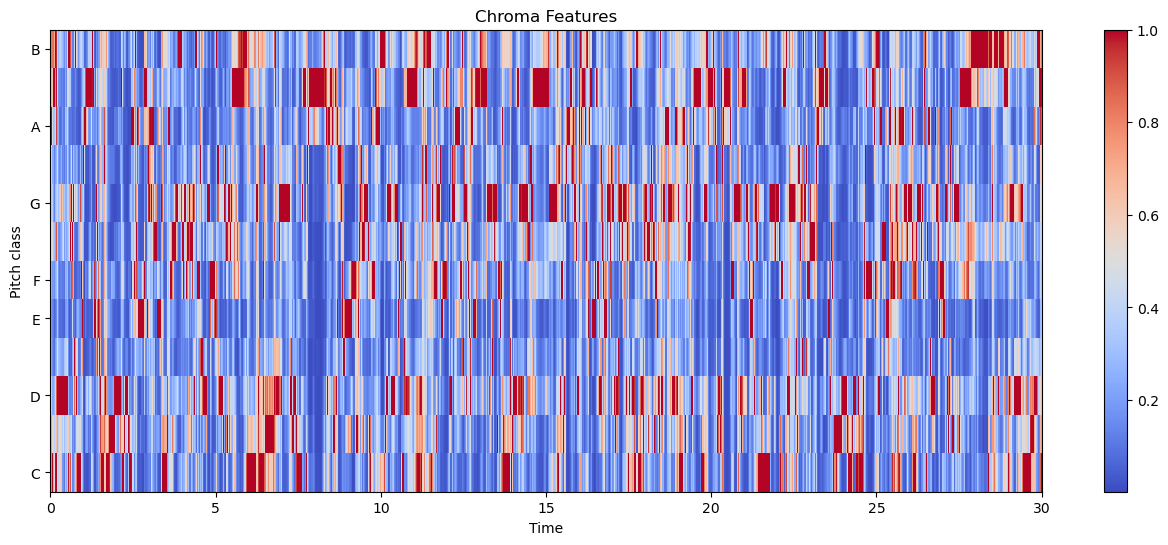

In [27]:
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

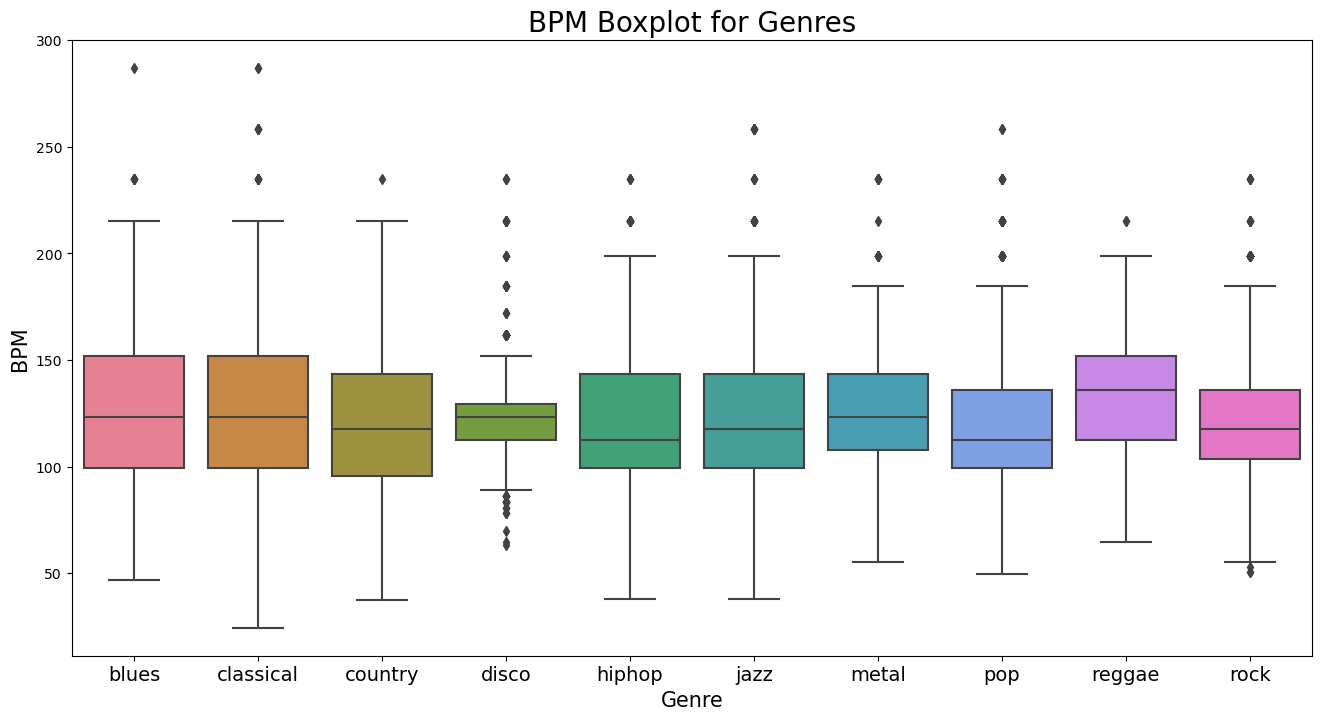

In [35]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl')

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

Text(0, 0.5, 'BPM')

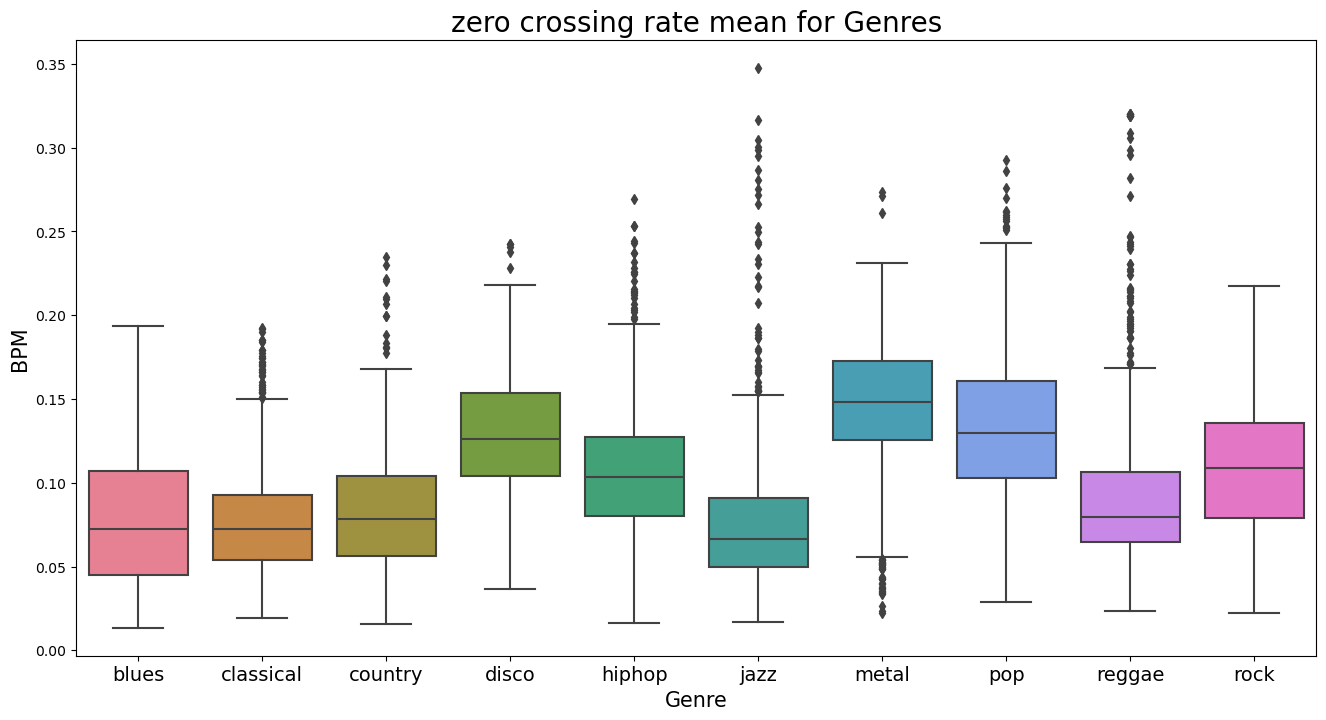

In [19]:
x = df[["label", "zero_crossing_rate_mean"]]

fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x = "label", y = "zero_crossing_rate_mean", data = x, palette = 'husl')

plt.title('zero crossing rate mean for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Text(0, 0.5, 'BPM')

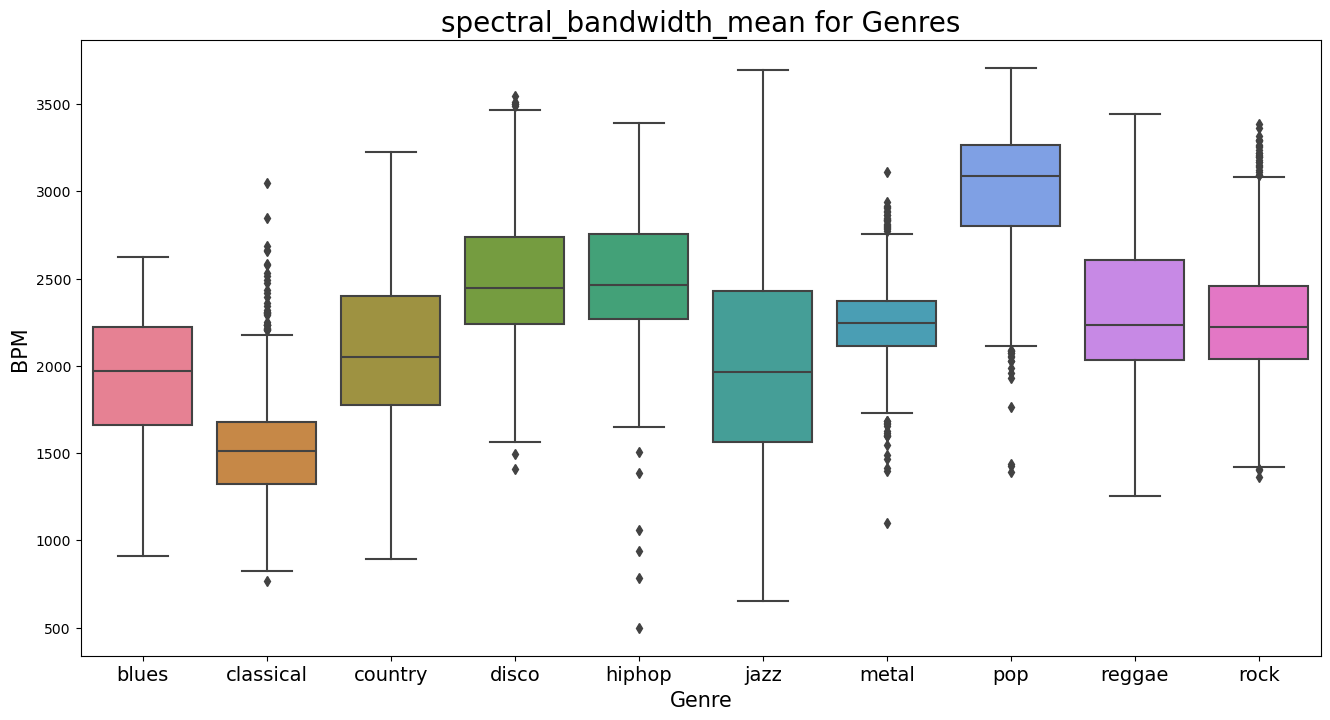

In [16]:
x = df[["label", "spectral_bandwidth_mean"]]

fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x = "label", y = "spectral_bandwidth_mean", data = x, palette = 'husl')

plt.title('spectral_bandwidth_mean for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

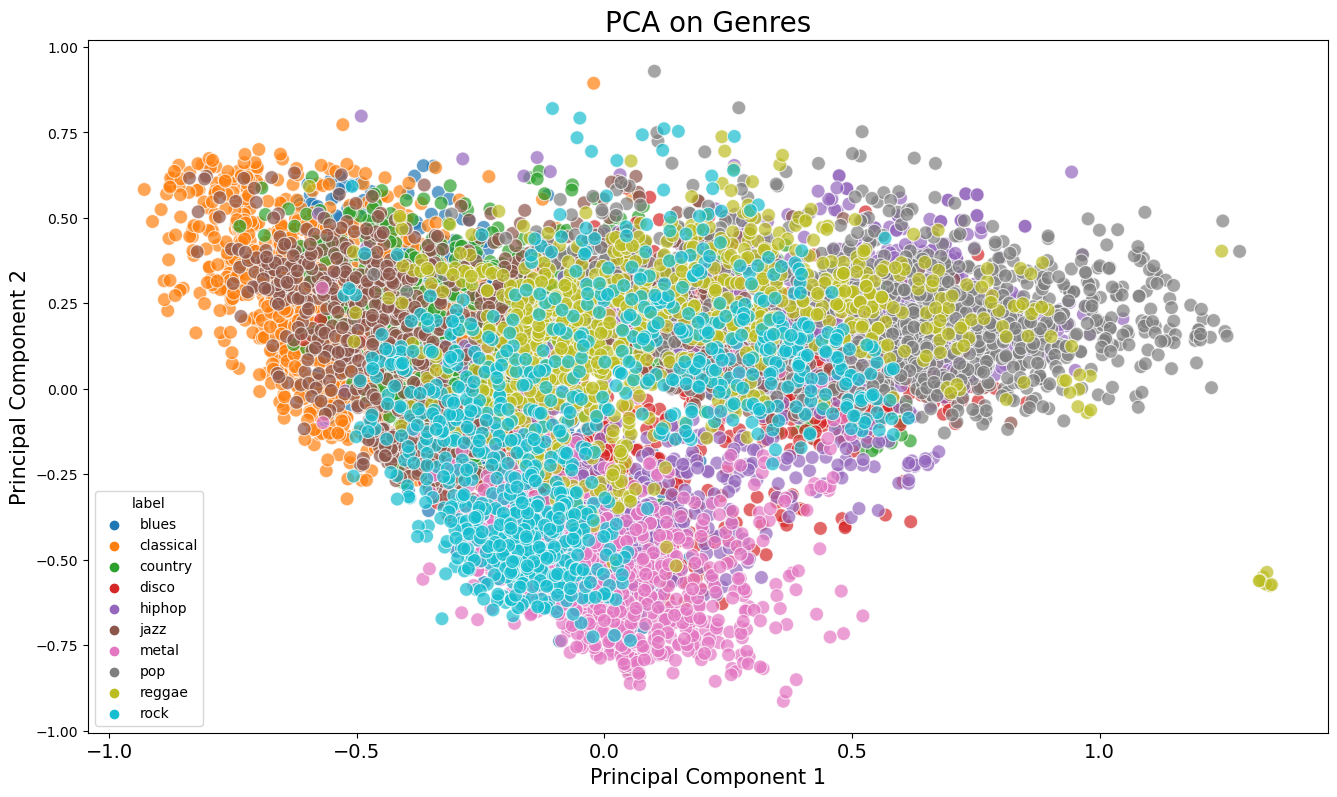

In [40]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

## what is the best pca component

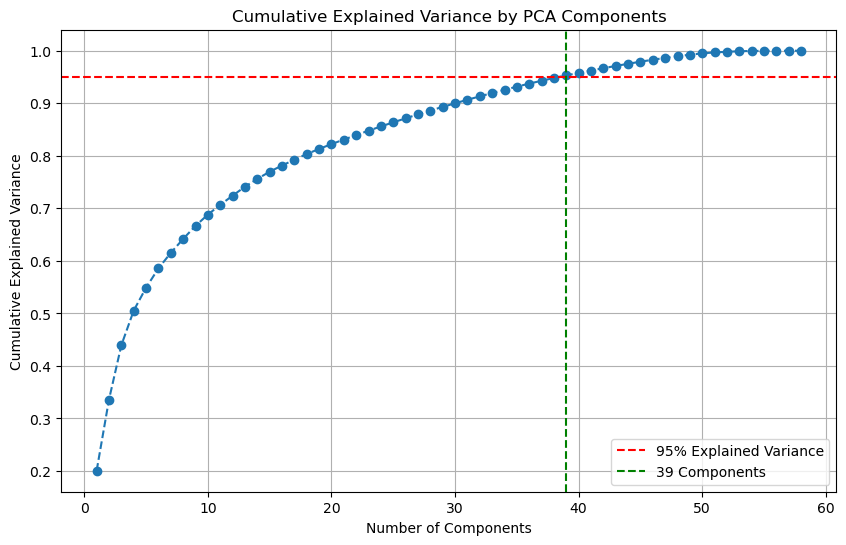

Number of components to retain 95% of variance: 39


In [9]:
X = np.array(df.drop(['filename', 'label'], axis=1))  # Drop non-feature columns
y = np.array(df['label'].values)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)      

# Perform PCA without specifying n_components to compute all components
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()

print(f"Number of components to retain 95% of variance: {n_components_95}")
